# DNNs in Keras

In [106]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD


import math
import matplotlib.pyplot as plt
import numpy as np
import random as rd

# Event Generation: y = cos(x)
Generate some number of test and training events

In [107]:
# Number of events to generate.
Nevts_train = 10000
Nevts_test = 1000

# Set up the training sets.
x_train = np.zeros([Nevts_train,1]); x_test = np.zeros([Nevts_test,1])
y_train = np.zeros([Nevts_train,1]); y_test = np.zeros([Nevts_test,1])

# Generate y = cos(x) for x in [0,2pi).
Nevts = Nevts_train + Nevts_test
for nn in range(Nevts):

    if(nn % int(Nevts/10) == 0):
        print "-- Event {0} of {1} ...".format(nn,Nevts)

    # Generate angle and cosine.
    th0 = rd.random()*2*math.pi
    cth0 = math.cos(th0)
    
    # Write the information to the datasets.
    if(nn >= Nevts_train):
        x_test[nn-Nevts_train][0] = th0/(2.*math.pi)
        y_test[nn-Nevts_train][0] = (1 + cth0)/2.
    else:
        x_train[nn][0] = th0/(2.*math.pi)
        y_train[nn][0] = (1 + cth0)/2.
        

-- Event 0 of 11000 ...
-- Event 1100 of 11000 ...
-- Event 2200 of 11000 ...
-- Event 3300 of 11000 ...
-- Event 4400 of 11000 ...
-- Event 5500 of 11000 ...
-- Event 6600 of 11000 ...
-- Event 7700 of 11000 ...
-- Event 8800 of 11000 ...
-- Event 9900 of 11000 ...


# Keras-based NN
Now build a NN and run the training step using Keras

In [108]:
model = Sequential()
model.add(Dense(output_dim=1024, input_dim=1))
model.add(Activation("relu"))
model.add(Dense(output_dim=1))
model.add(Activation("sigmoid"))
model.compile(loss='mse', optimizer=SGD(lr=0.1, momentum=0.9, nesterov=True))
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_37 (Dense)                 (None, 1024)          2048        dense_input_19[0][0]             
____________________________________________________________________________________________________
activation_36 (Activation)       (None, 1024)          0           dense_37[0][0]                   
____________________________________________________________________________________________________
dense_38 (Dense)                 (None, 1)             1025        activation_36[0][0]              
____________________________________________________________________________________________________
activation_37 (Activation)       (None, 1)             0           dense_38[0][0]                   
Total params: 3073
________________________________________________________________________

In [109]:
model.fit(x_train, y_train, nb_epoch=25, batch_size=32);

Epoch 1/25
10000/10000 [==============================] - 0s - loss: 0.0982     
Epoch 2/25
10000/10000 [==============================] - 0s - loss: 0.0160     
Epoch 3/25
10000/10000 [==============================] - 0s - loss: 0.0022     
Epoch 4/25
10000/10000 [==============================] - 0s - loss: 8.5844e-04     
Epoch 5/25
10000/10000 [==============================] - 0s - loss: 5.8973e-04     
Epoch 6/25
10000/10000 [==============================] - 0s - loss: 5.0429e-04     
Epoch 7/25
10000/10000 [==============================] - 0s - loss: 4.6661e-04     
Epoch 8/25
10000/10000 [==============================] - 0s - loss: 4.4425e-04     
Epoch 9/25
10000/10000 [==============================] - 0s - loss: 4.3209e-04     
Epoch 10/25
10000/10000 [==============================] - 0s - loss: 4.2214e-04     
Epoch 11/25
10000/10000 [==============================] - 0s - loss: 4.1436e-04     
Epoch 12/25
10000/10000 [==============================] - 0s - loss: 4.099

In [110]:
# Evaluate the model and produce a list of predictions for the test data.
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32);
y_pred = model.predict(x_test, batch_size=32, verbose=0)
print("\nMean loss is {0}".format(loss_and_metrics))

  32/1000 [..............................] - ETA: 0s
Mean loss is 0.000377597482875


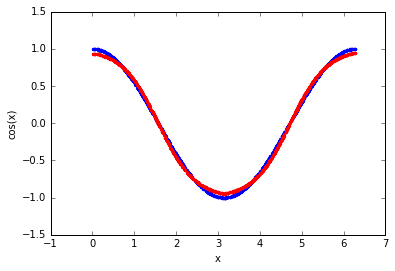

In [111]:
# Plot the actual (blue) vs. predicted (red) results
plt.scatter(2*x_test*math.pi,2*y_test-1,marker='.',color='blue')
plt.scatter(2*x_test*math.pi,2*y_pred-1,marker='.',color='red')
plt.xlabel("x"); plt.ylabel("cos(x)")
plt.show()